In [1]:
import pandas as pd
df =  pd.read_csv(r"INE_2024_2074.csv", sep=";")
df = df[(df["Periodo"] >= 2025) & (df["Periodo"] <= 2029) & (df["Sexo"] == "Total") & (df["Edad"] != "Todas las edades")]

#En relación a los totales poblacionales
# Reemplazar el punto de miles y cambiar la coma decimal por punto
df["Total"] = df["Total"].str.replace(".", "", regex=False)  # elimina los puntos de miles
df["Total"] = df["Total"].str.replace(",", ".", regex=False) # convierte la coma decimal en punto

# Convertir a int pasando por float para truncar
df["Total"] = df["Total"].astype(float).truncate().astype(int)

#En relación a las edades
df["Edad"] = df["Edad"].str.extract(r'(\d+)')  # extrae solo los números
df["Edad"] = df["Edad"].astype(int)

df = df[df["Edad"] >= 18]
df

,Sexo,Edad,Periodo,Total
1014,Total,18,2029,563058
1015,Total,18,2028,565544
1016,Total,18,2027,581045
1017,Total,18,2026,552864
1018,Total,18,2025,539744
...,...,...,...,...
5196,Total,100,2029,25053
5197,Total,100,2028,22691
5198,Total,100,2027,21011
5199,Total,100,2026,19301


In [2]:
# Añado las clases de edad que construimos en nuestro análisis
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae

df['Clase de edad'] = df['Edad'].apply(clase_edad)
df_final = df.groupby(["Periodo","Clase de edad"]).Total.sum().reset_index()
# df[(df["Periodo"] == 2025) & (df["Clase de edad"] == "18-24")]

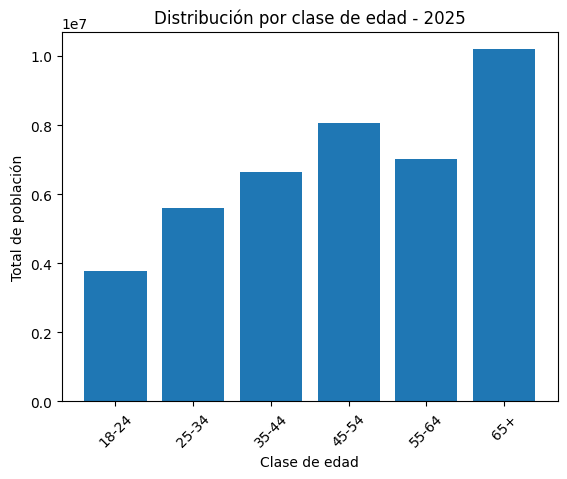

In [3]:
import matplotlib.pyplot as plt

# Filtrar un año específico
df_2025 = df_final[(df_final["Periodo"] == 2025)]

plt.bar(df_2025["Clase de edad"], df_2025["Total"])
plt.title("Distribución por clase de edad - 2025")
plt.xlabel("Clase de edad")
plt.ylabel("Total de población")
plt.xticks(rotation=45)
plt.show()




In [4]:
import pandas as pd
df_banca2024 =  pd.read_csv(r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_06.10_dataset.csv")

i = 0
while i < 5:
    i += 1
    name = f"df_banca{2024+i}"
    globals()[name] = df_banca2024.copy()
    globals()[name]["age"] = globals()[name]["age"] + i

df_banca2024


,id,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,deposit,Clase de edad,Perfil,month_num,date,weekday
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,1,-1,0,unknown,yes,35-44,Adultxs,5,2008-05-05,Monday
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,2,-1,0,unknown,yes,45-54,Divorciadxs,5,2008-05-05,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,26383,35.0,admin.,single,secondary,no,182,yes,no,unknown,...,1,-1,0,unknown,no,35-44,Adultxs,6,2008-06-03,Tuesday
26172,26384,53.0,management,married,unknown,no,527,yes,no,cellular,...,3,-1,0,unknown,no,45-54,Divorciadxs,7,2008-07-23,Wednesday
26173,26385,26.0,student,single,tertiary,no,39,no,no,cellular,...,3,-1,0,unknown,yes,25-34,Millenials,5,2008-05-26,Monday
26174,26386,86.0,retired,married,primary,no,5236,no,no,telephone,...,2,-1,0,unknown,yes,65+,Gen Z & Boomers,4,2009-04-01,Wednesday


In [5]:
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemas


def perfil(x):
    if x == "unknown":
        return "unknown"
    elif x == '18-24': 
        return "Gen Z & Boomers"
    elif  x == '25-34':
        return 'Millenials'
    elif  x == '35-44':
        return 'Adultxs'
    elif  x == '45-54':
        return 'Divorciadxs'
    elif  x == '55-64':
        return "Gen Z & Boomers"
    elif x == '65+':
        return "Gen Z & Boomers" #Como no hay edades inferiores a 18 no va dar problemas



for year in range(2025, 2030):
    name = f"df_banca{year}"
    df = globals()[name]
    df['Clase de edad'] = df['age'].apply(clase_edad)
    df['Perfil'] = df['Clase de edad'].apply(perfil)





Buscar una tipologia que ens permeti veure si hi ha una evolució entre les diferentes distribucions tant amb l'estadística de l'INE com amb el dataset que tenim dels nostres clients. 
Per comparar-les s'ha de fer un test estadístic que en aquest cas seria una t de student o bé Wilcoxon_Sum_Rank. Podem veure si hi ha diferències en la distribució. Nosaltres esperaríem assemblar-nos a la població descrita l'INE, és a dir, seguir una distribució igual a la poblacional per maximitzar el nostre potencial contractador. És válido a nivel económico?

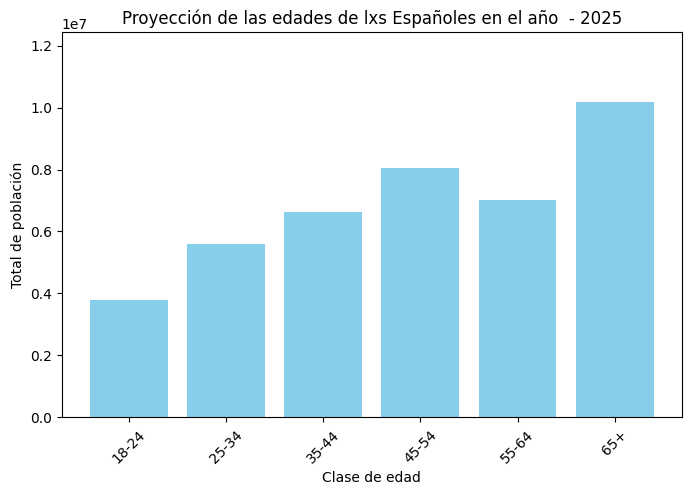

In [36]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Filtrar los años que nos interesan
anios = [2025, 2026, 2027, 2028, 2029]
df_filtrado = df_final[df_final["Periodo"].isin(anios)]

# Clases de edad (aseguramos orden estable)
clases = sorted(df_filtrado["Clase de edad"].unique())

# Configuración inicial del gráfico
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(clases, [0]*len(clases), color='skyblue')
ax.set_ylim(0, df_filtrado["Total"].max() * 1.1)
ax.set_xlabel("Clase de edad")
ax.set_ylabel("Total de población")
plt.xticks(rotation=45)

# Función que actualiza las barras
def update(frame):
    año = anios[frame]
    datos_año = df_filtrado[df_filtrado["Periodo"] == año].set_index("Clase de edad")
    for i, clase in enumerate(clases):
        bars[i].set_height(datos_año.loc[clase, "Total"] if clase in datos_año.index else 0)
    ax.set_title(f"Proyección de las edades de lxs Españoles en el año  - {año}")
    return bars

# 🚀 Creamos la animación y la mantenemos en variable global
global ani
ani = FuncAnimation(fig, update, frames=len(anios), interval=1500, repeat=True)

# Mostrar animación en Jupyter Notebook
HTML(ani.to_jshtml())

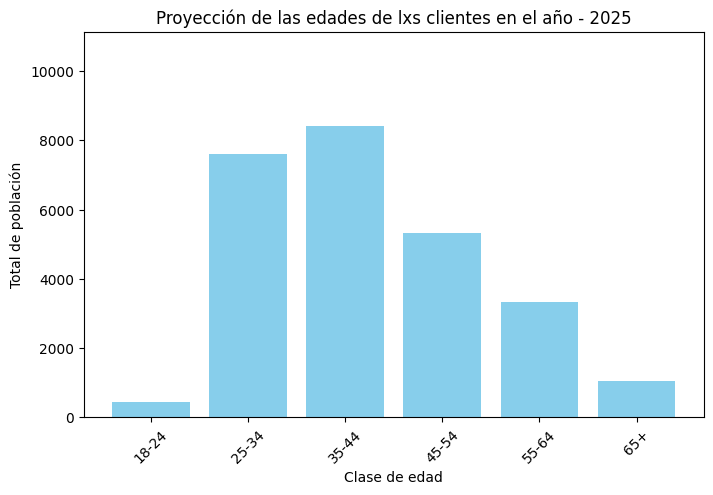

In [35]:
df_24 =df_banca2024.groupby("Clase de edad").id.count().reset_index()
df_25 =df_banca2025.groupby("Clase de edad").id.count().reset_index()
df_26 =df_banca2026.groupby("Clase de edad").id.count().reset_index()
df_27 =df_banca2027.groupby("Clase de edad").id.count().reset_index()
df_28 =df_banca2028.groupby("Clase de edad").id.count().reset_index()
df_29 =df_banca2029.groupby("Clase de edad").id.count().reset_index()

df_24["Año"] = 2024
df_25["Año"] = 2025
df_26["Año"] = 2026
df_27["Año"] = 2027
df_28["Año"] = 2028
df_29["Año"] = 2029

for df in [df_24, df_25, df_26, df_27, df_28, df_29]:
    df["Tipo"] = "clientes"

df_total = pd.concat([df_24, df_25, df_26, df_27, df_28, df_29], ignore_index=True)

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Filtrar los años que nos interesan
anios = [2025, 2026, 2027, 2028, 2029]
df_filtrado = df_total[df_total["Año"].isin(anios)]

# Clases de edad (aseguramos orden estable)
clases = sorted(df_filtrado["Clase de edad"].unique())

# Configuración inicial del gráfico
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(clases, [0]*len(clases), color='skyblue')
ax.set_ylim(0, df_filtrado["id"].max() * 1.1)
ax.set_xlabel("Clase de edad")
ax.set_ylabel("Total de población")
plt.xticks(rotation=45)

# Función que actualiza las barras
def update(frame):
    año = anios[frame]
    datos_año = df_filtrado[df_filtrado["Año"] == año].set_index("Clase de edad")
    for i, clase in enumerate(clases):
        bars[i].set_height(datos_año.loc[clase, "id"] if clase in datos_año.index else 0)
    ax.set_title(f"Proyección de las edades de lxs clientes en el año - {año}")
    return bars

# 🚀 Creamos la animación y la mantenemos en variable global
global ani
ani = FuncAnimation(fig, update, frames=len(anios), interval=1500, repeat=True)

# Mostrar animación en Jupyter Notebook
HTML(ani.to_jshtml())

In [ ]:
df_final["Tipo"] = "ine"
df_total = df_total.rename(columns={"id": "Total","Año":"Periodo"})
df_total = df_total[["Periodo","Clase de edad","Total","Tipo"]]
df_concatenados = pd.concat([df_total, df_final], ignore_index=True)
df_concatenados

from scipy.stats import shapiro
# Prueba de Shapiro-Wilk
stat, p = shapiro(df_concatenados["Total"][(df_concatenados["Tipo"] == "clientes")&(df_concatenados["Periodo"] == 2025)])

print("Estadístico de Shapiro-Wilk:", stat)
print("Valor p:", p)

# Prueba de Shapiro-Wilk
stat, p = shapiro(df_concatenados["Total"][(df_concatenados["Tipo"] == "ine")&(df_concatenados["Periodo"] == 2025)])

print("Estadístico de Shapiro-Wilk:", stat)
print("Valor p:", p)

#T - student pareado
from scipy.stats import ttest_rel

# Ejemplo: columnas con medidas antes y después
stat, p = ttest_rel(df["antes"], df["despues"])

print("Estadístico t:", stat)
print("Valor p:", p)

from scipy.stats import wilcoxon

# Ejemplo: dos listas o columnas con medidas pareadas
antes = [10, 12, 9, 11, 13, 12]
despues = [11, 14, 10, 13, 14, 13]

# Prueba de Wilcoxon pareada
stat, p = wilcoxon(antes, despues)

print("Estadístico de Wilcoxon:", stat)
print("Valor p:", p)

if p > 0.05:
    print("✅ No hay diferencia significativa (no se rechaza H₀).")
else:
    print("⚠️ Hay diferencia significativa (se rechaza H₀).")

Estadístico de Shapiro-Wilk: 0.9225894068958721
Valor p: 0.5242033466035381
Estadístico de Shapiro-Wilk: 0.9919448835761706
Valor p: 0.9933807116007216
